In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# data = "/Users/sandeep/Fault_detection/data"
signals_data = pd.read_csv("/Users/sandeep/Fault_detection/data/signals.csv")

In [3]:
data = "/Users/sandeep/Fault_detection/data"
normal_data = pd.read_csv(os.path.join(data, "normal_signals.csv"))
spike_signals = pd.read_csv(os.path.join(data, "spike_signals.csv"))
sag_signals = pd.read_csv(os.path.join(data, "sag_signals.csv"))
noisy_signals = pd.read_csv(os.path.join(data, "noisy_signals.csv"))
freq_change_signals = pd.read_csv(os.path.join(data, "freq_change_signals.csv"))

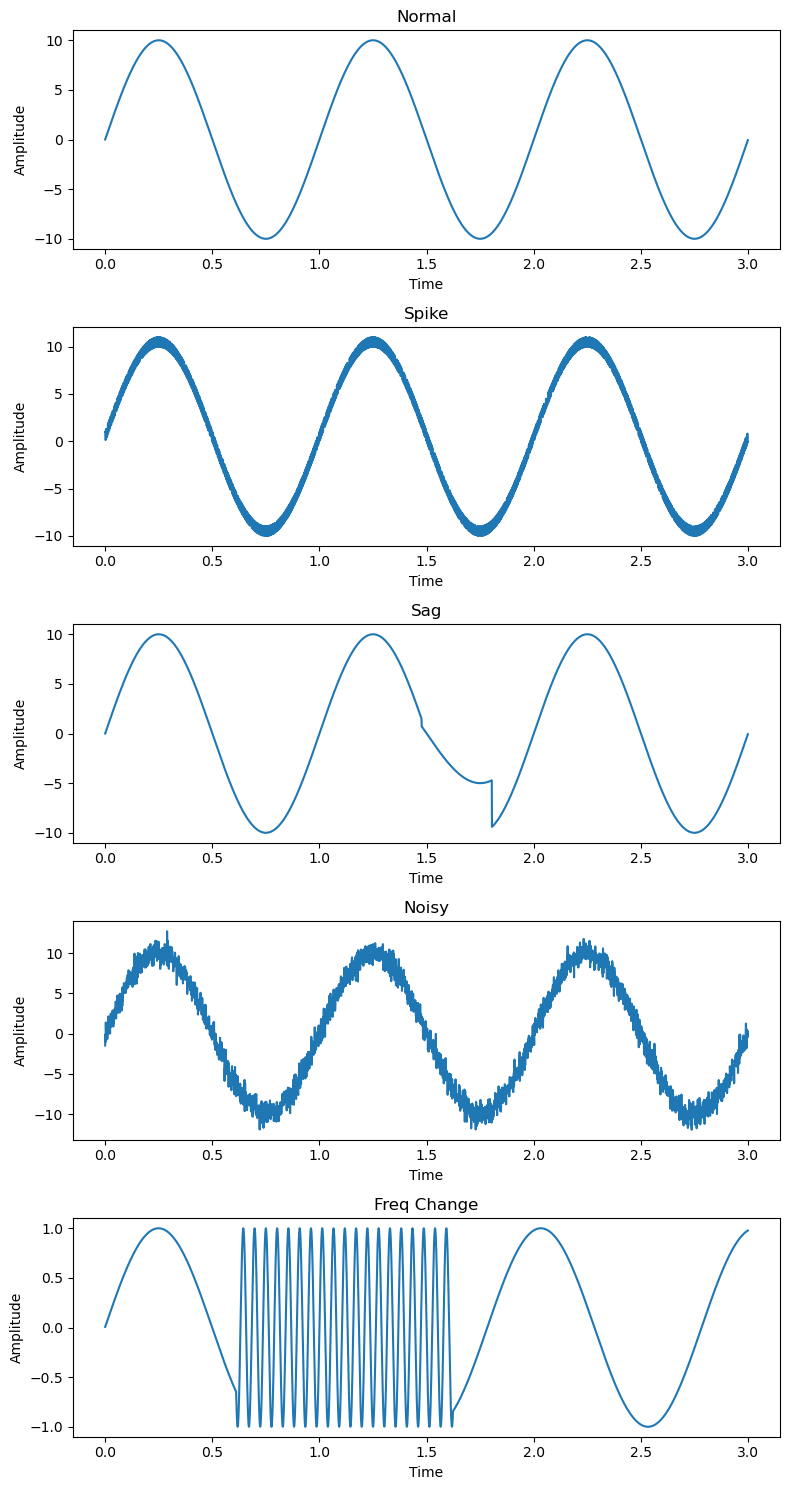

In [4]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 15))  # 5 rows, 1 column

for ax, df, name in zip(axes, 
                        [normal_data, spike_signals, sag_signals, noisy_signals, freq_change_signals], 
                        ['Normal', 'Spike', 'Sag', 'Noisy', 'Freq Change']):
    ax.plot(df['Time'], df['Amplitude'])
    ax.set_title(name)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [5]:
def save_data(data, signals_data, fs):
    rms = np.sqrt(np.mean(np.square(data['Amplitude'])))
    mean = data['Amplitude'].mean()
    std = data['Amplitude'].std()
    peak = data['Amplitude'].max()

    signal = data["Amplitude"].values

    fft_vals = np.fft.rfft(signal)    # Fast Fourier Transform
    fft_freqs = np.fft.rfftfreq(len(signal), d=1/fs)    # frequency bins in Hz , fs = sampling frequency

    magnitude = np.abs(fft_vals)   # magnitude spectrum

    # Dominant Frequency
    dominant_idx = np.argmax(magnitude)
    dominant_freq = fft_freqs[dominant_idx]
    
    # Frequency Spread
    numerator = np.sum(((fft_freqs - dominant_freq)**2) * magnitude)
    denominator = np.sum(magnitude)
    freq_spread = np.sqrt(numerator / denominator)

    # print("Dominant Frequency:", dominant_freq, "Hz")
    # print("Frequency Spread:", freq_spread, "Hz")

    # Save data
    rows = len(signals_data)

    updated_signals_data = pd.concat([signals_data, pd.DataFrame([{
        'id': rows + 1,
        'rms': rms,
        'mean': mean,
        'std': std,
        'peak': peak,
        'dom_freq': dominant_freq,
        'freq_spread': freq_spread,
        'label': data.iloc[0]['Label']
    }])], ignore_index=True)

    return updated_signals_data
    
signals = [normal_data, spike_signals, sag_signals, noisy_signals, freq_change_signals]

# idx = np.random.randint(0, 2)

# if idx == 1 :
#     signals.reverse()

# for data in signals:
#     signals_data = save_data(data, signals_data, 1000)

# pd.set_option('display.width', None)
# print(signals_data.to_string())

In [6]:
test_data = pd.read_csv("/Users/sandeep/Fault_detection/data/test_data.csv")
for data in signals:
    test_data = save_data(data, test_data, 1000)

# y_pred = rnd_clf.predict(X_test)
print(test_data.to_string())
test_data.to_csv("/Users/sandeep/Fault_detection/data/test_data.csv", index = False)

    id       rms          mean       std       peak  dom_freq  freq_spread        label
0    1  0.707107 -2.007283e-16  0.707461   0.999921      24.0     0.000071       Normal
1    2  0.997302  5.300000e-01  0.845237   1.999921       0.0   274.618552        Spike
2    3  0.667288  6.461774e-03  0.667590   0.999921      24.0    59.955270          Sag
3    4  1.078019  5.293953e-02  1.077257   2.822061      24.0   263.973764        Noisy
4    5  0.707725 -1.907327e-03  0.708077   0.999980      24.0   275.891594  Freq_change
5    6  0.707107 -2.007283e-16  0.707461   0.999921      24.0     0.000071       Normal
6    7  0.997302  5.300000e-01  0.845237   1.999921       0.0   274.618552        Spike
7    8  0.667288  6.461774e-03  0.667590   0.999921      24.0    59.955270          Sag
8    9  1.078019  5.293953e-02  1.077257   2.822061      24.0   263.973764        Noisy
9   10  0.707725 -1.907327e-03  0.708077   0.999980      24.0   275.891594  Freq_change
10  11  0.707107 -2.007283e-16  

In [7]:
signals_shuffled = signals_data.sample(frac=1).reset_index(drop=True)
signals_shuffled.to_csv("/Users/sandeep/Fault_detection/data/signals.csv", index = False)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = pd.read_csv("/Users/sandeep/Fault_detection/data/signals.csv")

X = df.drop(["label", "id"], axis = 1)
y = df["label"]

scaled_array = scaler.fit_transform(X)
X = pd.DataFrame(scaled_array, columns=X.columns)


In [9]:
print(X.head(10))

        rms      mean       std      peak  dom_freq  freq_spread
0 -0.835503 -0.505676 -0.812269 -0.885053 -0.505896    -0.424174
1  0.232281 -0.508936  0.252380  0.179210 -0.434137     0.226979
2  0.232677 -0.505572  0.253071  0.150807 -0.888610    -1.308247
3  0.310380  2.099770  0.258280  0.611098 -0.888610     1.197139
4  2.606410 -0.505572  2.618608  2.283722  1.479437    -1.308219
5 -0.835408 -0.497119 -0.812154 -0.885062 -0.434137    -0.918451
6  0.237589 -0.498867  0.257435  0.400361 -0.434137     1.358854
7 -0.835400 -0.507549 -0.812108 -0.885056 -0.338458     1.646208
8 -0.598116 -0.496935 -0.575470 -0.634070  1.479437     0.210846
9  0.235622 -0.499754  0.255475  0.330957 -0.864691     1.506284


In [10]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X, y)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [11]:
test_data = test_data.sample(frac=1).reset_index(drop=True)

X_test = test_data.drop(["label", "id"], axis = 1)
y_test = test_data["label"]

scaled_array = scaler.fit_transform(X_test)
X_test = pd.DataFrame(scaled_array, columns=X_test.columns)

y_pred =  rnd_clf.predict(X_test)
# print(test_data.head())
# print(X_test.head())

In [12]:
count = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        count += 1
print('Accuracy is : ', (count/len(y_pred)) * 100, "%") 

Accuracy is :  76.0 %
